In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
from shapely.geometry import Point

In [2]:
place = "Antalya, Turkiye"
network_type = 'walk'
trip_times = [5,10,15,25] # in minutes
travel_speed = 4.5 #walking speed in km/hour

In [3]:
graph = ox.graph_from_address(
    place,
    network_type=network_type
)

print(graph)

MultiDiGraph with 1206 nodes and 3688 edges


In [ ]:
#derived from geojson.io selected by lag, lon

center_node = ox.nearest_nodes(graph,36.899708152002844, 30.69587423136062)

In [5]:
meters_per_minute = travel_speed * 1000 / 60 
for u, v, k, data in graph.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

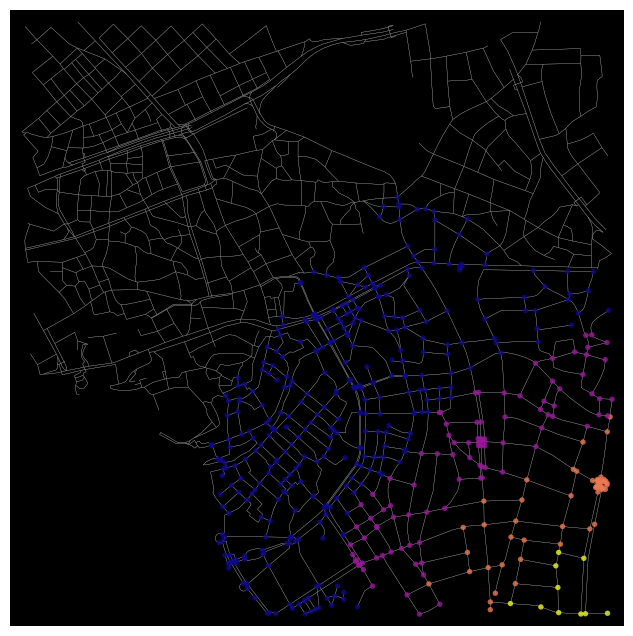

In [6]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(graph, center_node, radius=trip_time,  distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
ns = [15 if node in node_colors else 0 for node in graph.nodes()]
# plot graph
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2,bgcolor='k', edge_linewidth=0.2, edge_color='#999999')